# k-means clustering demo in 2D

In [113]:
import numpy as np
import numpy.random as npr

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics.pairwise import euclidean_distances

import matplotlib.pyplot as plt
%matplotlib inline

def plot_clust(X,W=None,z=None):
    if z is not None:
        if np.any(z<0):
            plt.scatter(X[z<0,0], X[z<0,1], marker="o", facecolors='none', edgecolor='black', alpha=0.3);
        if np.any(z>=0):
            plt.scatter(X[z>=0,0], X[z>=0,1], marker="o", c=z[z>=0], alpha=0.3);
    else:
        plt.scatter(X[:,0], X[:,1], marker="o", c='black', alpha=0.3);
    if W is not None:
        plt.scatter(W[:,0], W[:,1], marker="^", s=200, c=np.arange(W.shape[0]));
    else:
        plt.title("number of clusters = %d" % len(set(np.unique(z))-set([-1])));

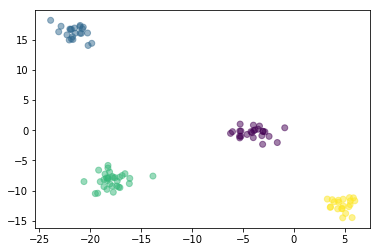

In [114]:
# make up some fake data

npr.seed(2) 
# above: it's fine to delete this, but you might have to
# re-run things a few times to see the effects of interest

n = 100
d = 2
k_true = 4
W_true = npr.randn(k_true,d)*10
z_true = npr.randint(0,k_true,size=n)
X = np.zeros((n,2))
for i in range(n):
    X[i] = W_true[z_true[i]] + npr.randn(d)

plt.scatter(X[:,0], X[:,1], c=z_true, marker="o", alpha=0.5);

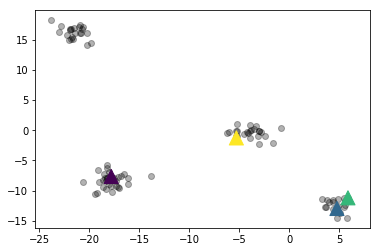

In [115]:
# randomly initialize means

k = 4
W = X[npr.choice(n, k, replace=False)]

plot_clust(X,W)

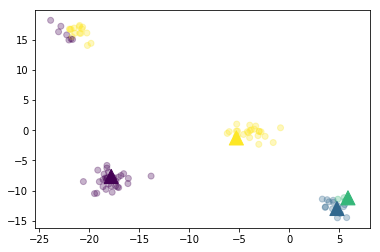

In [116]:
# assign each object to closest mean

def update_z(X,W):
    dist2 = euclidean_distances(X, W)
    return np.argmin(dist2, axis=1)

z = update_z(X,W)
plot_clust(X,W,z)

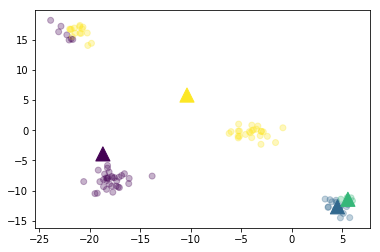

In [117]:
# recompute cluster centres

def update_W(X,z,W_old):
    # just being a bit careful about the case of a cluster with no points in it
    W = W_old.copy()
    for kk in range(k):
        W[kk] = np.mean(X[z==kk],axis=0)
    return W

W = update_W(X,z,W)
plot_clust(X,W,z)

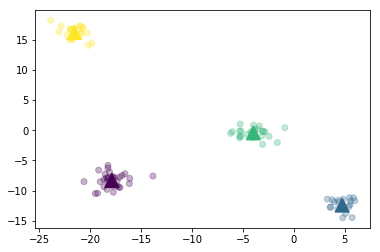

In [118]:
# run the whole thing for 100 iterations
# better: loop until np.all(z_new == z)
for itr in range(100):
    z = update_z(X,W)
    W = update_W(X,z,W)
plot_clust(X,W,z)

In [119]:
W

array([[-17.86258967,  -8.30231749],
       [  4.75460109, -12.40041605],
       [ -3.9696076 ,  -0.42369729],
       [-21.5215559 ,  16.21977151]])

In [120]:
z

array([1, 1, 0, 2, 2, 2, 3, 1, 1, 0, 2, 0, 1, 1, 1, 0, 0, 3, 0, 2, 1, 1, 3,
       2, 2, 0, 0, 1, 1, 3, 1, 0, 2, 2, 0, 2, 0, 2, 0, 1, 1, 3, 1, 1, 0, 2,
       0, 3, 0, 1, 3, 3, 2, 1, 3, 0, 2, 0, 3, 3, 3, 3, 0, 2, 0, 0, 1, 2, 1,
       2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 3, 0, 3, 0, 0, 0, 1, 2, 0, 3, 2, 2, 3,
       3, 0, 3, 3, 3, 3, 0, 2])

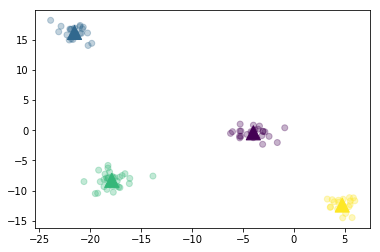

In [121]:
# compare to sklearn kmeans

kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
plot_clust(X,kmeans.cluster_centers_, kmeans.labels_)

Note the label switching.

Comparing different initializations:

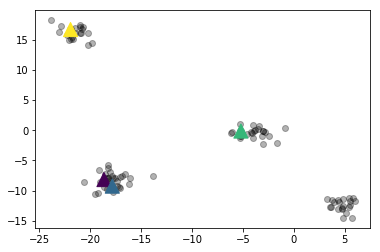

In [122]:
# pick a different initialization and re-run
npr.seed(1)

W = X[npr.choice(n, k, replace=False)]
plot_clust(X,W)

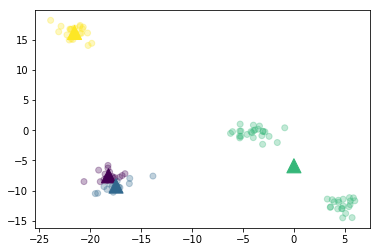

In [123]:
for itr in range(100):
    z = update_z(X,W)
    W = update_W(X,z,W)
    
plot_clust(X,W,z)

# DBSCAN demo in 2D

Motivation: non-convex clusters

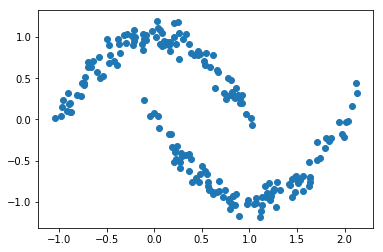

In [136]:
n1 = 100
x1 = np.linspace(-1,1,n1) + npr.randn(n1)*.1
y1 = 1-x1**2 + npr.randn(n1)*.1
n2 = 100
x2 = np.linspace(0,2,n2) + npr.randn(n2)*.1
y2 = (x2-1)**2-1 + npr.randn(n2)*.1
x = np.concatenate((x1,x2))
y = np.concatenate((y1,y2))
plt.scatter(x,y)
X = np.concatenate((x[:,None],y[:,None]),axis=1)

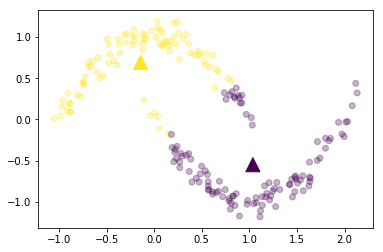

In [137]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

plot_clust(X,kmeans.cluster_centers_, kmeans.labels_)

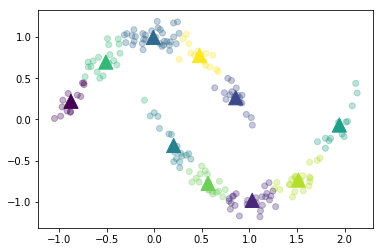

In [138]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)

plot_clust(X,kmeans.cluster_centers_, kmeans.labels_)

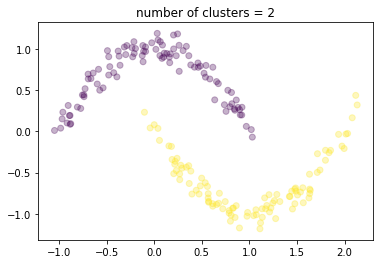

In [139]:
dbscan = DBSCAN(eps=0.3)
dbscan.fit(X)
plot_clust(X,z=dbscan.labels_)

### Effect of the DBSCAN hyperparameters

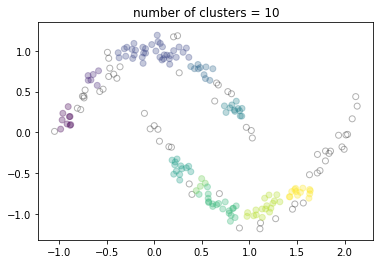

In [140]:
dbscan = DBSCAN(eps=0.1)
dbscan.fit(X)
plot_clust(X,z=dbscan.labels_)

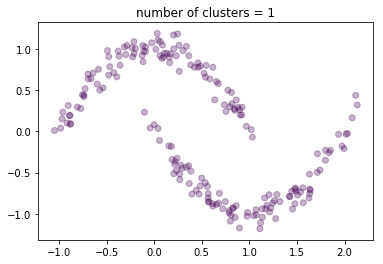

In [141]:
dbscan = DBSCAN(eps=1)
dbscan.fit(X)
plot_clust(X,z=dbscan.labels_)

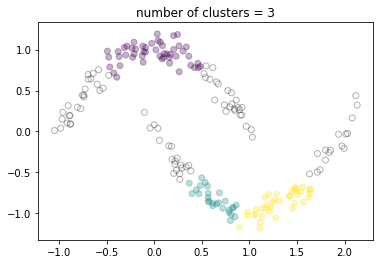

In [142]:
dbscan = DBSCAN(eps=0.3, min_samples=25)
dbscan.fit(X)
plot_clust(X,z=dbscan.labels_)

## Effect of initialization with DBSCAN

We can change the "initialization" by re-ordering the points. The effects are small but can change the label of some points between clusters.

In [158]:
X_extra = np.concatenate((X, [[0.5,0]]), axis=0)

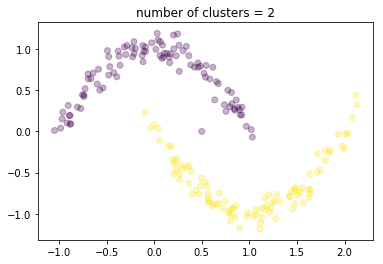

In [159]:
dbscan = DBSCAN(eps=0.4)
dbscan.fit(X_extra)
plot_clust(X_extra,z=dbscan.labels_)

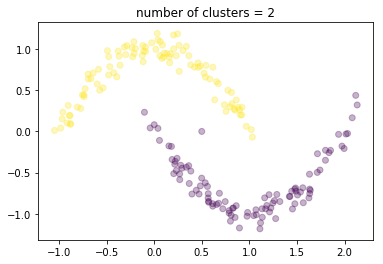

In [160]:
X_extra_reversed = X_extra[::-1]

dbscan = DBSCAN(eps=0.4)
dbscan.fit(X_extra_reversed)
plot_clust(X_extra_reversed,z=dbscan.labels_)

Above, we reversed the order of the data set which flipped the cluster colours. But, notice the middle point was originally in the top cluster and is now in the bottom cluster.

### An example where k-means works better

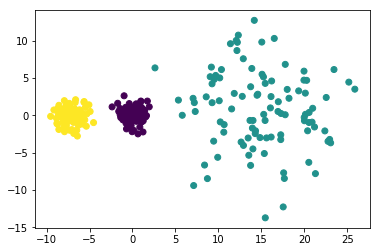

In [189]:
n1 = 100
μ1 = [0,0]
σ1 = 1
X1 = σ1*npr.randn(n1,2) + μ1

n2 = 100
μ2 = [15,0]
σ2 = 5
X2 = σ2*npr.randn(n2,2) + μ2

n3 = 100
μ3 = [-7,0]
σ3 = 1
X3 = σ3*npr.randn(n3,2) + μ3


X = np.concatenate((X1,X2,X3))
z_true = np.concatenate((np.zeros(n1),np.ones(n2),np.ones(n2)+1))

plt.scatter(X[:,0],X[:,1], c=z_true);

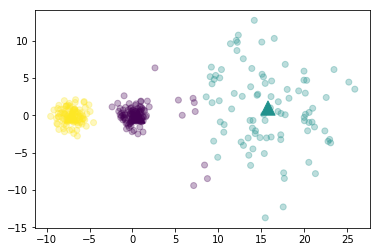

In [190]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
plot_clust(X,kmeans.cluster_centers_, kmeans.labels_)

$k$-means performs reasonably here, although of course it gets the benefit of me telling it the true number of clusters.

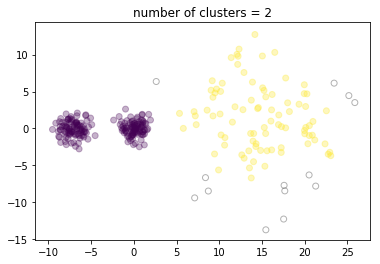

In [197]:
dbscan = DBSCAN(eps=3, min_samples=5)
dbscan.fit(X)
plot_clust(X,z=dbscan.labels_)

This doesn't look too great. You can try fiddling with the hyperparameters of DBSCAN here. The example is problematic because we have two different densities of clusters, and yet the `eps` parameter roughly sets a single density of cluster that we're looking for. If we make `eps` large enough to keep the non-dense (right-hand) cluster together, then it'll also end up joining the left two clusters.